In [3]:
import datasets
import pandas as pd
import torchvision.transforms.v2

In [2]:
pip install ipywidgets

  Using cached ipywidgets-8.1.8-py3-none-any.whl.metadata (2.4 kB)
  Using cached widgetsnbextension-4.0.15-py3-none-any.whl.metadata (1.6 kB)
  Using cached jupyterlab_widgets-3.0.16-py3-none-any.whl.metadata (20 kB)
Using cached ipywidgets-8.1.8-py3-none-any.whl (139 kB)
Using cached jupyterlab_widgets-3.0.16-py3-none-any.whl (914 kB)
Using cached widgetsnbextension-4.0.15-py3-none-any.whl (2.2 MB)

   ------------- -------------------------- 1/3 [jupyterlab_widgets]
   ------------- -------------------------- 1/3 [jupyterlab_widgets]
   -------------------------- ------------- 2/3 [ipywidgets]
   -------------------------- ------------- 2/3 [ipywidgets]
   -------------------------- ------------- 2/3 [ipywidgets]
   -------------------------- ------------- 2/3 [ipywidgets]
   ---------------------------------------- 3/3 [ipywidgets]

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
from datasets import load_dataset

# Укажите тот же путь, который вы использовали при скачивании
cache_dir = "./my_dataset_folder"

# Библиотека проверит папку и мгновенно загрузит данные из кэша
dataset = load_dataset("deepcopy/MathWriting-human", cache_dir=cache_dir)

sample = dataset["train"][5]
image = sample["image"]
latex = sample["latex"]

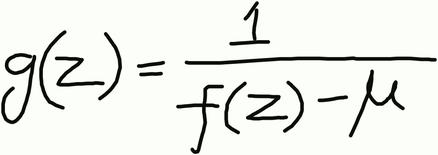

In [54]:
image

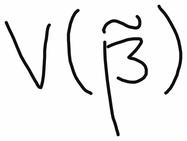

In [100]:
image.convert("L")

In [55]:
from torchvision import transforms
import torch

class SmartResizer(torch.nn.Module):
    def forward(self, img):
        img_h, img_w = img.shape[-2:]
        # if img_w > W or img_h > H:
        #     k = min(W / img_w, H / img_h)
        #     # print(k)
        #     resizer = transforms.Compose([
        #         transforms.Resize((int(k * img_h), int(k * img_w)), interpolation=transforms.InterpolationMode.NEAREST)
        #     ])
        #     img = resizer(img)
        dx = W - img_w
        dy = H - img_h
        pl = 0  # left
        pu = 0  # up
        pr = 0  # right
        pd = 0  # down
        if dx > 0:
            # Add in dim=-1
            border = random.randint(1, dx + 1)
            pl = border
            pr = dx - border
        if dy > 0:
            # Add in dim=-1
            border = random.randint(1, dy + 1)
            pd = border
            pu = dy - border
        padder = transforms.Pad((pl, pu, pr, pd), fill=0)  # left, top, right and bottom
        img = padder(img)
        return img

In [56]:
W=640
H=480

In [64]:
import random
from PIL import Image, ImageOps

transform = transforms.Compose([
    transforms.Grayscale(num_output_channels=1),  # [H, W] → 1 канал
    transforms.Lambda(lambda x: ImageOps.invert(x)),
    transforms.ColorJitter(contrast=(5, 5)),  # >0 повышает яркость
    transforms.ToTensor(),  # [1, H, W], float32 [0,1]
    SmartResizer(),
    #transforms.Normalize(mean=[0.5], std=[0.5]),
])

In [65]:
a = transform(image)

In [66]:
a

tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]])

In [67]:
a[0]

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])

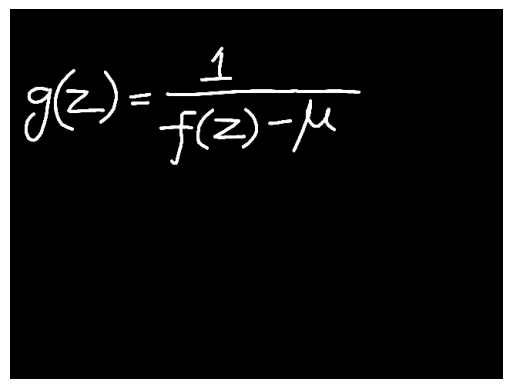

In [69]:
import matplotlib.pyplot as plt

img = a.squeeze(0)  # убираем канал → [H, W]

plt.imshow(img, cmap="gray", vmin=0, vmax=1)
plt.axis("off")
plt.show()


In [52]:
a[0][340][300]

tensor(-1.)

In [81]:
a.shape

torch.Size([1, 480, 640])

In [94]:
img = SmartResizer()(a)  # только паддинг
print("min/max/mean:", img.min(), img.max(), img.mean())


min/max/mean: tensor(0.) tensor(1.) tensor(0.0782)


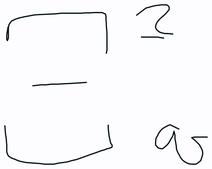

In [4]:
image

In [134]:
type(dataset)

datasets.dataset_dict.DatasetDict

In [5]:
latex

'\\Xi_{q}^{z}'

In [136]:
sample

{'image': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=125x32>,
 'latex': 'u_{0}=\\frac{4}{(n\\pi)^{2}}dQU_{el}',
 'sample_id': '05607d04dfabb922',
 'split_tag': 'train',
 'data_type': 'human'}

In [137]:
dataset["train"]

Dataset({
    features: ['image', 'latex', 'sample_id', 'split_tag', 'data_type'],
    num_rows: 229864
})

In [138]:
from transformers import BeitModel, BeitConfig
import torch

KeyboardInterrupt: 

In [13]:
model = BeitModel.from_pretrained("microsoft/beit-base-patch16-224-pt22k-ft22k")

config.json: 0.00B [00:00, ?B/s]

E:\Projects_pycharm\AIboardNotes2\.venv\Lib\site-packages\huggingface_hub\file_download.py:143: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\ХХХ\.cache\huggingface\hub\models--microsoft--beit-base-patch16-224-pt22k-ft22k. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


pytorch_model.bin:   0%|          | 0.00/414M [00:00<?, ?B/s]

In [18]:
Beit = model

In [19]:
Beit

BeitModel(
  (embeddings): BeitEmbeddings(
    (patch_embeddings): BeitPatchEmbeddings(
      (projection): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
    )
    (dropout): Dropout(p=0.0, inplace=False)
  )
  (encoder): BeitEncoder(
    (layer): ModuleList(
      (0): BeitLayer(
        (attention): BeitAttention(
          (attention): BeitSdpaSelfAttention(
            (query): Linear(in_features=768, out_features=768, bias=True)
            (key): Linear(in_features=768, out_features=768, bias=False)
            (value): Linear(in_features=768, out_features=768, bias=True)
            (dropout): Dropout(p=0.0, inplace=False)
            (relative_position_bias): BeitRelativePositionBias()
          )
          (output): BeitSelfOutput(
            (dense): Linear(in_features=768, out_features=768, bias=True)
            (dropout): Dropout(p=0.0, inplace=False)
          )
        )
        (intermediate): BeitIntermediate(
          (dense): Linear(in_features=768, out_fea

In [8]:
train_dataset = dataset["train"]

In [9]:
train_dataset

Dataset({
    features: ['image', 'latex', 'sample_id', 'split_tag', 'data_type'],
    num_rows: 229864
})

In [8]:
from torchvision import transforms

transform = transforms.Compose([
    transforms.ColorJitter(contrast=(5, 5)),  # >0 повышает яркость
    transforms.Grayscale(num_output_channels=1),  # [H, W] → 1 канал
    #transforms.ToTensor(),                        # [1, H, W], float32 [0,1]
])

In [9]:
image.size

(212, 169)

In [10]:
from PIL import ImageEnhance

In [11]:
ImageEnhance.Brightness(image)

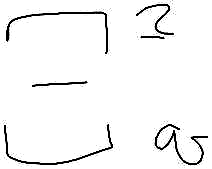

In [12]:
transform(image)

In [23]:
H

480

In [22]:
W = int(os.getenv("W"))
H = int(os.getenv("H"))

In [6]:
from datasets import load_dataset
from torch.utils.data import Dataset
from torchvision import transforms
from tqdm import trange
from dotenv import load_dotenv
import os
import torch
import numpy as np
import random

load_dotenv()

W = int(os.getenv("W"))
H = int(os.getenv("H"))

class SmartResizer(torch.nn.Module):
    def forward(self, img):
        img_h, img_w = img.shape[-2:]
        if img_w > W or img_h > H:
            k = min(W / img_w, H / img_h)
            #print(k)
            resizer = transforms.Compose([
                transforms.Resize((int(k * img_h), int(k * img_w)))
            ])
            img = resizer(img)
        dx = W - img_w
        dy = H - img_h
        pl = 0 # left
        pu = 0 # up
        pr = 0 # right
        pd = 0 # down
        if dx > 0:
            # Add in dim=-1
            border = random.randint(1, dx + 1)
            pl = border
            pr = dx - border
        if dy > 0:
            # Add in dim=-1
            border = random.randint(1, dy + 1)
            pd = border
            pu = dy - border
        padder = transforms.Pad((pl, pu, pr, pd)) # left, top, right and bottom
        img = padder(img)
        return img

class PreparedDataset(Dataset):
    def __init__(self, hf_dataset, mode="train"):
        self.dataset = hf_dataset[mode]
        self.transform = transforms.Compose([
            transforms.ColorJitter(contrast=(5, 5)),  # >0 повышает яркость
            transforms.Grayscale(num_output_channels=1),  # [H, W] → 1 канал
            transforms.ToTensor(),                        # [1, H, W], float32 [0,1]
            SmartResizer(),
        ])

    def __len__(self):
        return len(self.dataset)

    def __getitem__(self, idx):
        sample = self.dataset[idx]
        image = self.transform(sample["image"])
        return image, sample["latex"]


# путь при скачивании
cache_dir = "./my_dataset_folder"
print("загрузка датасета MathWriting-human...")
# библиотека проверит папку и мгновенно загрузит данные из кэша
dataset = load_dataset("deepcopy/MathWriting-human", cache_dir=cache_dir)
print("датасет MathWriting-human загружен успешно")

ds_train = PreparedDataset(dataset, mode="train")
ds_test = PreparedDataset(dataset, mode="test")


загрузка...
загружено успешно


In [10]:
ds_train[2]

(tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]]),
 '\\tilde{f}:X\\rightarrow M_{f}')

In [4]:
latex

['V(\\tilde{\\beta})',
 'GL(V)\\times S_{n}',
 '\\tilde{f}:X\\rightarrow M_{f}',
 '\\{g_{1},g_{2},g_{3}\\}']

In [67]:
class SmartResizer(torch.nn.Module):
    def forward(self, img):
        img_h, img_w = img.shape[-2:]
        if img_w > W or img_h > H:
            k = min(W / img_w, H / img_h)
            #print(k)
            resizer = transforms.Compose([
                transforms.Resize((int(k * img_h), int(k * img_w)))
            ])
            img = resizer(img)
        dx = W - img_w
        dy = H - img_h
        pl = 0 # left
        pu = 0 # up
        pr = 0 # right
        pd = 0 # down
        if dx > 0:
            # Add in dim=-1
            border = random.randint(1, dx + 1)
            pl = border
            pr = dx - border
        if dy > 0:
            # Add in dim=-1
            border = random.randint(1, dy + 1)
            pd = border
            pu = dy - border

        padder = transforms.Pad((pl, pu, pr, pd)) # left, top, right and bottom
        img = padder(img)

        return img

In [68]:
import random


In [69]:
test_transform = transforms.Compose([
    SmartResizer(),

])

In [70]:
new_im

tensor([[[1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         ...,
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.]]])

In [71]:
a = test_transform(new_im)

In [72]:
a.shape

torch.Size([1, 480, 640])

In [192]:
image.size

(187, 141)

In [193]:
from torchvision import transforms

In [73]:
a

tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]])

Resize(size=(5, 5), interpolation=bilinear, max_size=None, antialias=True)

In [ ]:
import os
import pandas as pd
from torchvision.io import decode_image
from torch.utils.data import Dataset, DataLoader

class CustomImageDataset(Dataset):
    def __init__(self, annotations_file, img_dir, transform=None, target_transform=None):
        self.img_labels = pd.read_csv(annotations_file)
        self.img_dir = img_dir
        self.transform = transform
        self.target_transform = target_transform

    def __len__(self):
        return len(self.img_labels)

    def __getitem__(self, idx):
        img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, 0])
        image = decode_image(img_path)
        label = self.img_labels.iloc[idx, 1]
        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            label = self.target_transform(label)
        return image, label